In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('/content/States.csv')
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
43737,2022-05-02,Virginia,51,1705650,20237
43738,2022-05-02,Washington,53,1511033,12750
43739,2022-05-02,West Virginia,54,501743,6857
43740,2022-05-02,Wisconsin,55,1614160,14415


In [3]:
ny = df[df['state']=='New York'].drop(columns=['state', 'fips']).set_index('date')
ny

,cases,deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,11,0
2020-03-05,22,0
...,...,...
2022-04-28,5136083,67648
2022-04-29,5144886,67664
2022-04-30,5150193,67684


In [4]:
print("Size/Shape of the dataset: ",ny.shape)
print("Checking for null values:\n",ny.isnull().sum())
print("Checking Data-type of each column:\n",ny.dtypes)

Size/Shape of the dataset:  (793, 2)
Checking for null values:
 cases     0
deaths    0
dtype: int64
Checking Data-type of each column:
 cases     int64
deaths    int64
dtype: object


In [5]:
f1 = make_subplots(rows=2,cols=2, subplot_titles=("New York cases", "New York deaths",'USA cases', 'USA deaths'))
f1.update_layout(width=1000, height=800, showlegend=False, bargap=0, title_text="New COVID-19 Cases")
f1.add_trace(go.Bar(x=ny.cases.index, y=ny.cases.values), 1, 1)
f1.add_trace(go.Bar(x=ny.deaths.index, y=ny.deaths.values), 1, 2)
f1.add_trace(go.Bar(x=df.cases.index, y=df.cases.values), 2, 1)
f1.add_trace(go.Bar(x=df.deaths.index, y=df.deaths.values), 2, 2)
f1.show()

In [6]:
moving_avg1 = ny['cases'].rolling(50).mean()
moving_avg2 = ny['deaths'].rolling(50).mean()
f2 = make_subplots(rows=1,cols=2, subplot_titles=("Moving average of cases in NY", " Moving average of New York deaths"))
f2.add_trace(go.Bar(x=moving_avg1.index, y=moving_avg1.values), 1, 1)
f2.add_trace(go.Bar(x=moving_avg2.index, y=moving_avg2.values), 1, 2)
f2.show()

In [7]:
ny_moving_avg_diff1 = ny['cases'] - moving_avg1
ny_moving_avg_diff2 = ny['deaths'] - moving_avg2

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



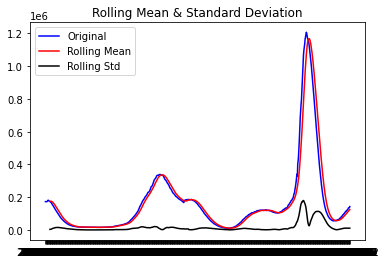

Results of Dickey-Fuller Test:
Test Statistic                  -2.968312
p-value                          0.037961
#Lags Used                      18.000000
Number of Observations Used    725.000000
Critical Value (1%)             -3.439402
Critical Value (5%)             -2.865535
Critical Value (10%)            -2.568897
dtype: float64


In [9]:
ny_moving_avg_diff1.dropna(inplace=True)
test_stationarity(ny_moving_avg_diff1)

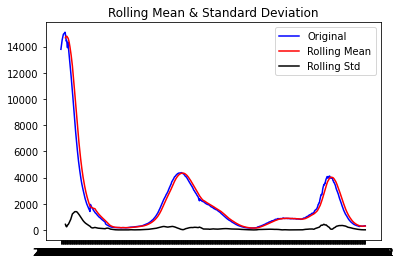

Results of Dickey-Fuller Test:
Test Statistic                -5.742298e+00
p-value                        6.235052e-07
#Lags Used                     1.700000e+01
Number of Observations Used    7.260000e+02
Critical Value (1%)           -3.439389e+00
Critical Value (5%)           -2.865529e+00
Critical Value (10%)          -2.568894e+00
dtype: float64


In [10]:
ny_moving_avg_diff2.dropna(inplace=True)
test_stationarity(ny_moving_avg_diff2)

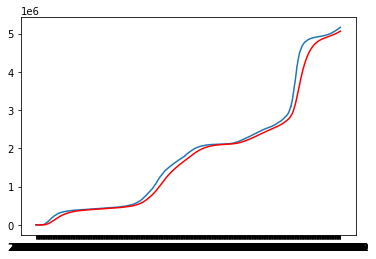

In [11]:
expwighted_avg1 = ny['cases'].ewm(halflife=12).mean()
expwighted_avg2 = ny['deaths'].ewm(halflife=12).mean()
plt.plot(ny['cases'])
plt.plot(expwighted_avg1, color='red')

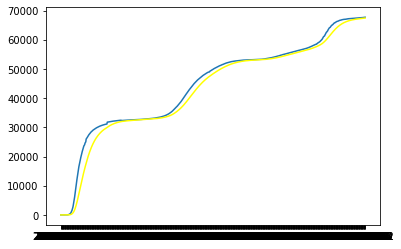

In [12]:
plt.plot(ny['deaths'])
plt.plot(expwighted_avg2, color='yellow')

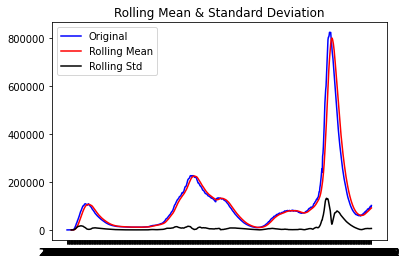

Results of Dickey-Fuller Test:
Test Statistic                  -3.567539
p-value                          0.006413
#Lags Used                      21.000000
Number of Observations Used    771.000000
Critical Value (1%)             -3.438860
Critical Value (5%)             -2.865296
Critical Value (10%)            -2.568770
dtype: float64


In [13]:
ny_ewma_diff1 = ny['cases'] - expwighted_avg1
ny_ewma_diff2 = ny['deaths'] - expwighted_avg2
test_stationarity(ny_ewma_diff1)

In [14]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

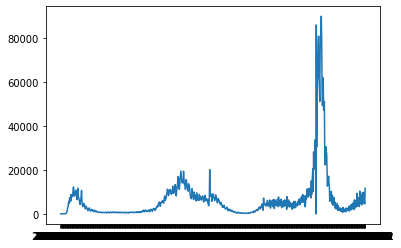

In [15]:
ny_diff = ny['cases'] - ny['cases'].shift()
plt.plot(ny_diff)

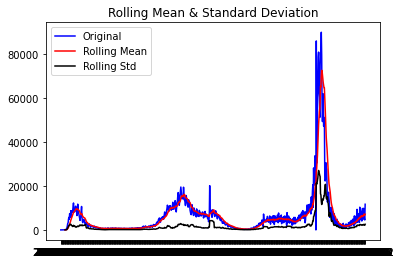

Results of Dickey-Fuller Test:
Test Statistic                  -2.931246
p-value                          0.041833
#Lags Used                      20.000000
Number of Observations Used    771.000000
Critical Value (1%)             -3.438860
Critical Value (5%)             -2.865296
Critical Value (10%)            -2.568770
dtype: float64


In [16]:
ny_diff.dropna(inplace=True)
test_stationarity(ny_diff)

In [21]:
cases_acf = acf(ny_diff, nlags=50)
cases_pacf = pacf(ny_diff, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



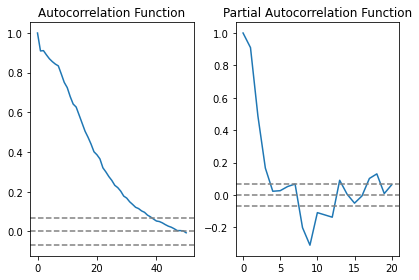

In [23]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(cases_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ny_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ny_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(cases_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ny_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ny_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

AR Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 13041625294.5858')

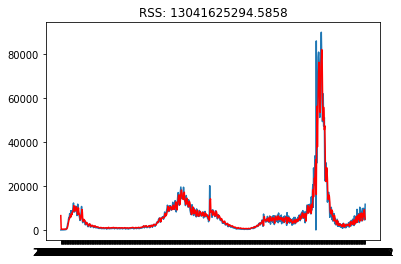

In [29]:
model = ARIMA(ny['cases'], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ny_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ny_diff)**2))

MA Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 32459598321.5417')

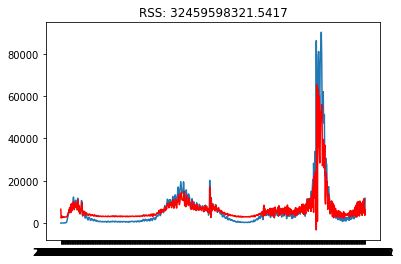

In [31]:
model = ARIMA(ny['cases'], order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ny_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ny_diff)**2))

Combined model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 12673326903.3425')

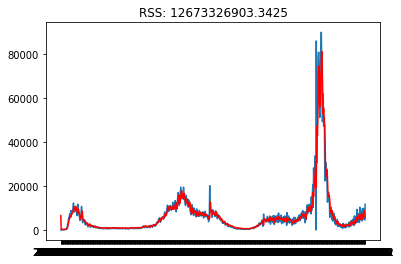

In [32]:
model = ARIMA(ny['cases'], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ny_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ny_diff)**2))

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2020-03-02    6523.247482
2020-03-03     613.912631
2020-03-04     315.913662
2020-03-05     269.076370
2020-03-06     260.973733
dtype: float64


In [35]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2020-03-02    6523.247482
2020-03-03    7137.160112
2020-03-04    7453.073774
2020-03-05    7722.150144
2020-03-06    7983.123877
dtype: float64


In [39]:
predictions_ARIMA_log = pd.Series(ny.cases[0], index=ny.cases.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2020-03-01       1.000000
2020-03-02    6524.247482
2020-03-03    7138.160112
2020-03-04    7454.073774
2020-03-05    7723.150144
dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

overflow encountered in exp



Text(0.5, 1.0, 'RMSE: inf')

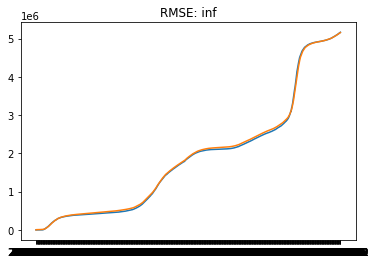

In [44]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ny['cases'])
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ny['cases'])**2)/len(ny['cases'])))

In [20]:
new_cases = 5177153 #for the next day

In [10]:
n = len(ny)
def mean_cal(ny, x820, n):
  for i in range(len(ny)):
    if n > 1:
      new_mean = (n * ny[n-1] + x820)/(n+1)
    else:
      new_mean = ny[0]
  return round(new_mean,2) 

In [11]:
new_mean = mean_cal(ny['cases'], new_cases, n)
new_mean

5166426.53

In [12]:
#variance of x(n-1)
old_var = []
def var(x, new_cases,new_mean, n):
  old_mean = x.mean()
  for i in range(len(x)):
    difference = (x - old_mean)**2
    sum_of_diff = sum(difference)
    old_varr = sum_of_diff/n
  old_var.append(old_varr)
  if  n>1:
    new_var = (n*(old_var[0]**2 + old_mean**2) + new_cases**2)/(n+1) - new_mean**2
  else:
    new_var = 0
  return round(new_var,2)

In [13]:
var(ny['cases'], new_cases,new_mean, n)

5.327729780551185e+24

In [14]:
#Moving average
k = 50
def simple_ma(df, n,k,moving_ave,new_cases):
  for i in range(len(df)):
    if n > k:
      simple_m_avg = moving_ave[n-1] + ((new_cases - df[n+1 - k])/k)
    else:
      simple_m_avg = sum(df[i])/k
  return simple_m_avg

In [15]:
simple_ma(ny['cases'], n,k,moving_ave,new_cases)

array([5028585.24])